In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import sys
from pathlib import Path

# Add the src directory to the Python path
sys.path.append(str(Path.cwd().parent.parent / "src"))

from utils._eda import TimeSeriesEDA

In [5]:
# Load the dataset
file_path = "../../data/bronze/LD2011_2014.txt"
df = pd.read_csv(file_path, sep=";", index_col=0, parse_dates=True, decimal=",")

In [6]:
# Check the first few rows
display(df.head())

# Get dataset info
print(df.info())

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
2011-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 01:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 140256 entries, 2011-01-01 00:15:00 to 2015-01-01 00:00:00
Columns: 370 entries, MT_001 to MT_370
dtypes: float64(370)
memory usage: 397.0 MB
None


In [7]:
# Print only columns with missing values
missing_columns = df.columns[df.isnull().any()]
print("Columns with missing values:", missing_columns.tolist())

Columns with missing values: []


In [ ]:
# Summary statistics
print(df.describe())

              MT_001         MT_002         MT_003         MT_004  \
count  140256.000000  140256.000000  140256.000000  140256.000000   
mean        3.970785      20.768480       2.918308      82.184490   
std         5.983965      13.272415      11.014456      58.248392   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       2.844950       0.000000      36.585366   
50%         1.269036      24.893314       1.737619      87.398374   
75%         2.538071      29.871977       1.737619     115.853659   
max        48.223350     115.220484     151.172893     321.138211   

              MT_005         MT_006         MT_007         MT_008  \
count  140256.000000  140256.000000  140256.000000  140256.000000   
mean       37.240309     141.227385       4.521338     191.401476   
std        26.461327      98.439984       6.485684     121.981187   
min         0.000000       0.000000       0.000000       0.000000   
25%        15.853659      71.4285

In [9]:
# Convert column names to numeric (Client IDs)
df.columns = [f"Client_{i+1}" for i in range(df.shape[1])]

# Resample to hourly data
df_hourly = df.resample("h").sum()

# Resample to daily data
df_daily = df.resample("D").sum()

### Plot Clients Load over Time


🕒 PREPARING DATETIME INDEX
✓ Index is already a DatetimeIndex

🔍 DETECTING TIME SERIES FREQUENCY
   → Pandas inferred frequency: h
╔═════════════════════════════════════════════════╗
║              TIME SERIES ANALYSIS               ║
╚═════════════════════════════════════════════════╝

📊 SUMMARY STATISTICS
───────────────────────────────
  mean: 15.882686323658525
  variance: 522.4935697874001
  min: 0.0
  max: 138.3248730964467
  missing_values: 0
  periodicity: hourly

📈 STATIONARITY TEST
───────────────────────────────
  ADF Statistic: -7.2985882768460755
  p-value: 1.357293999717946e-10
  Lags Used: 51
  Critical Values: {'1%': np.float64(-3.4305367814665044), '5%': np.float64(-2.8616225527935106), '10%': np.float64(-2.566813940257257)}
  Stationary: True

⚠️ OUTLIERS DETECTED
───────────────────────────────
  Z-score method: 381 outliers
  Seasonal method: 1126 outliers

📉 VISUALIZATIONS
───────────────────────────────
Plot saved to ../../reports//time_series.png


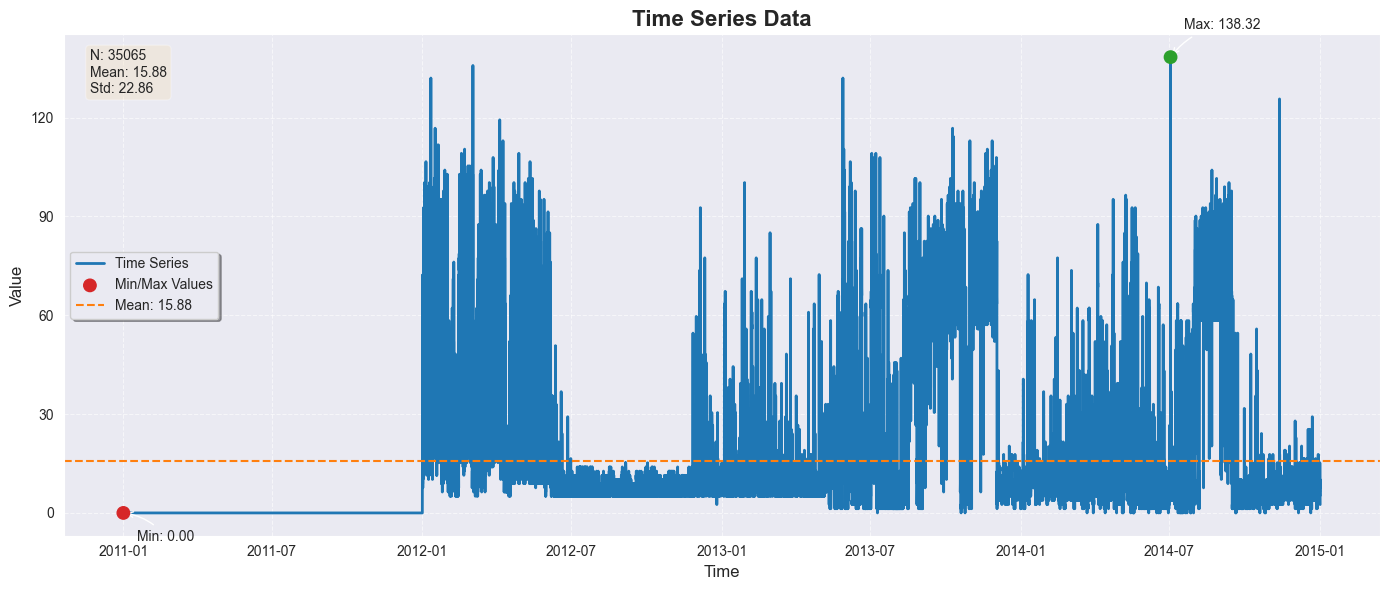

Plot saved to ../../reports//rolling_stats.png


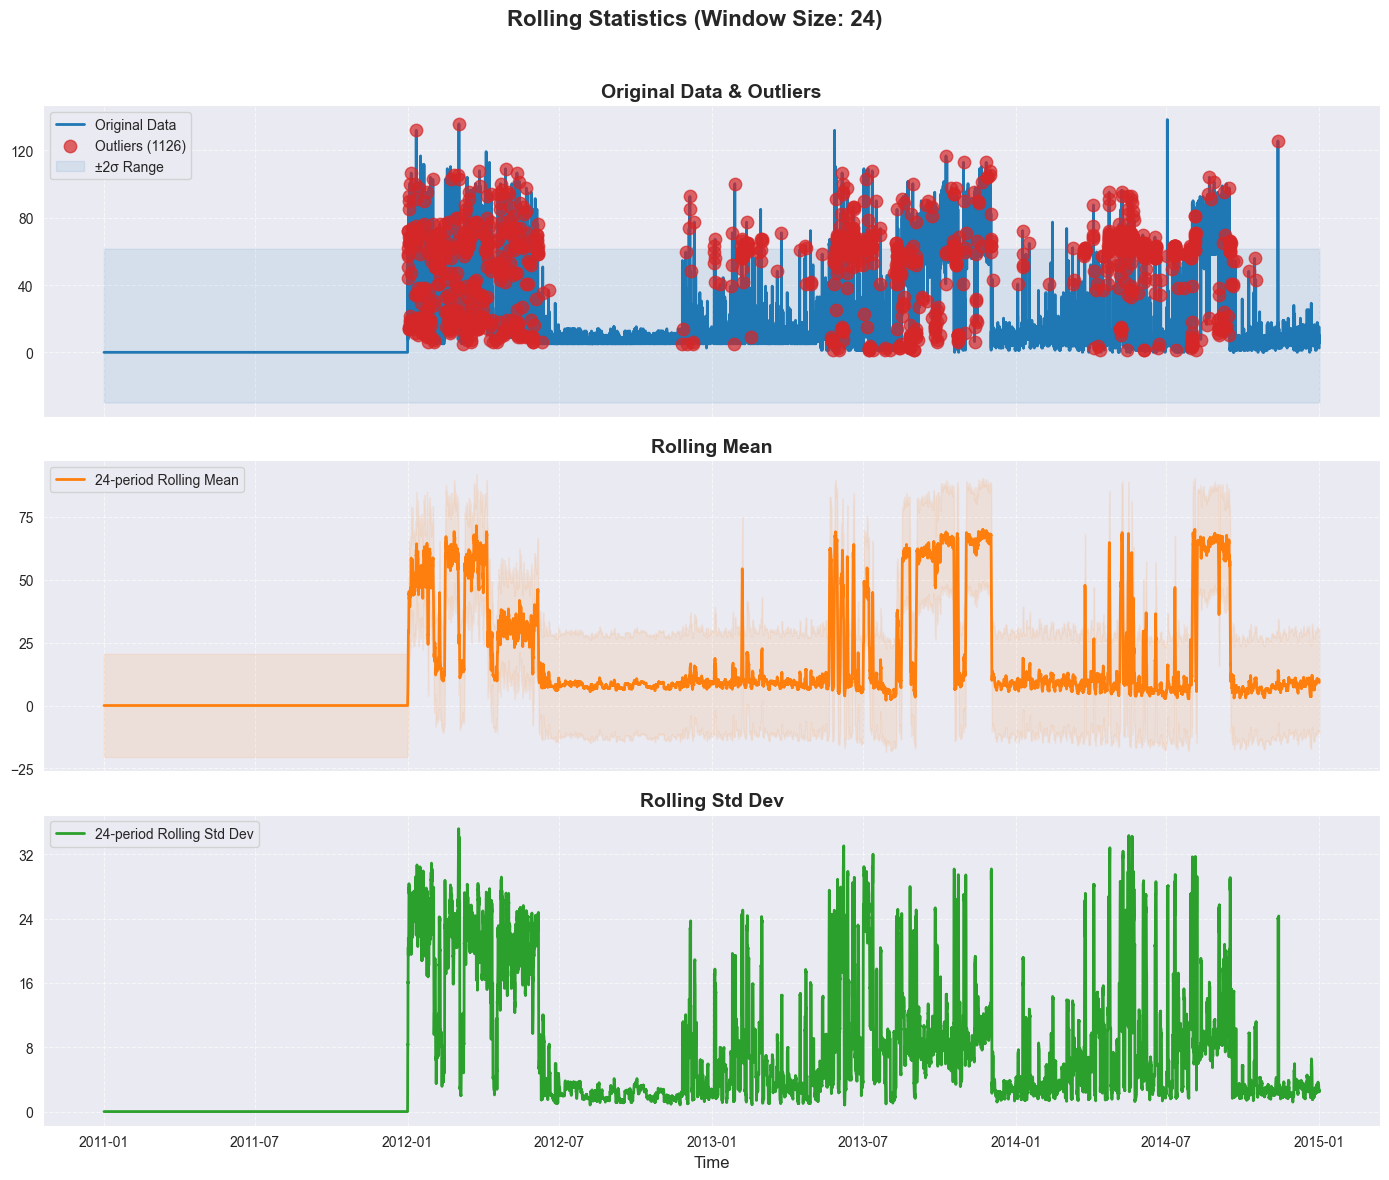

Plot saved to ../../reports//decomposition.png


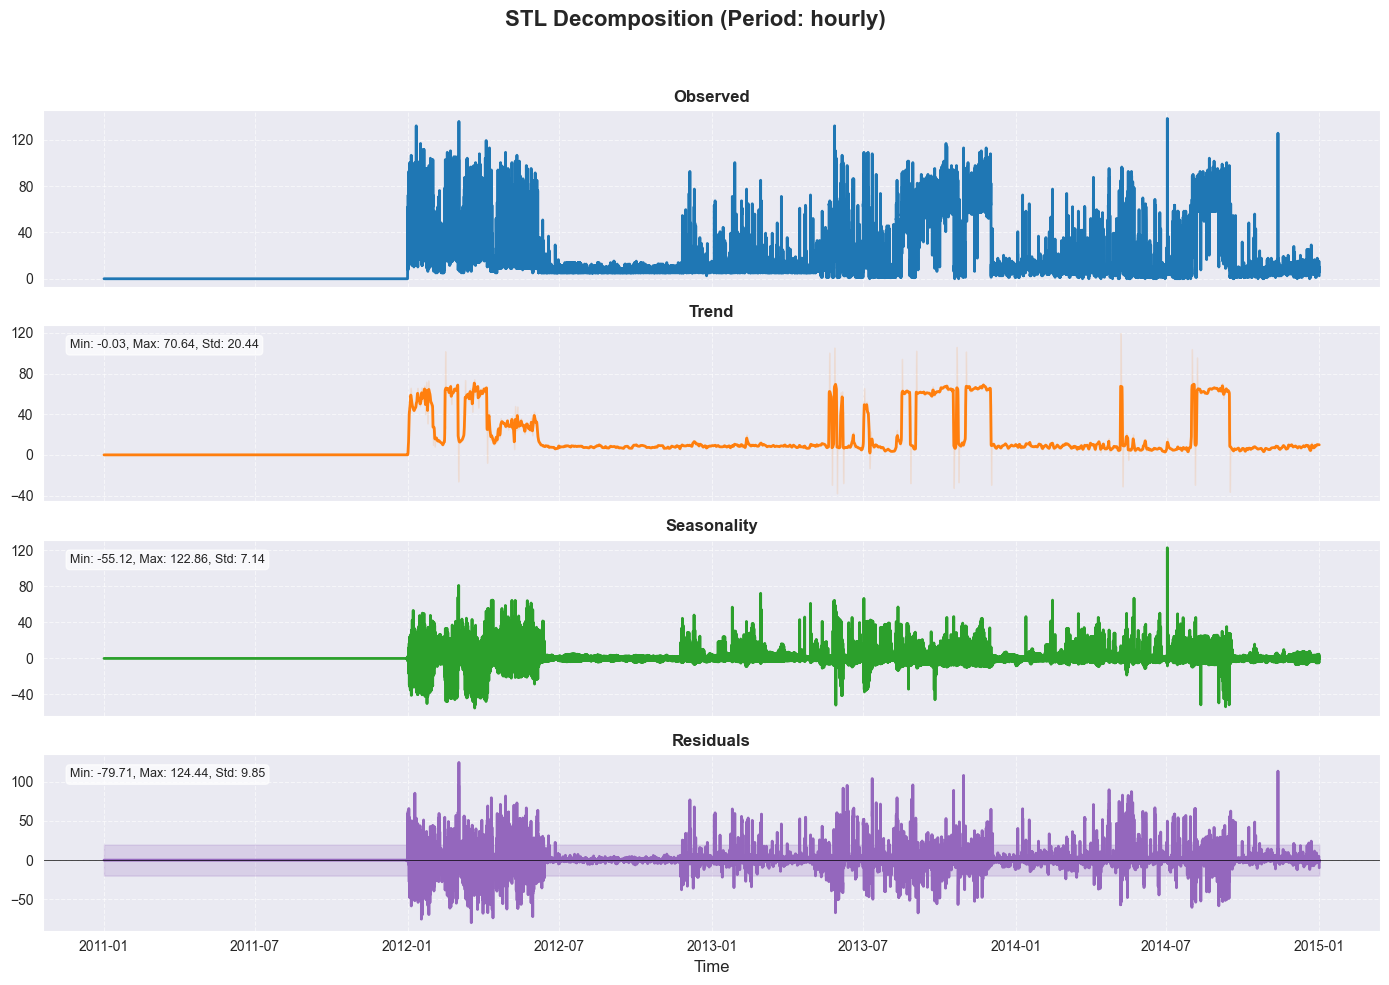

c:\Users\tiago\OneDrive\Dokumente\GitHub\Energy-Deman-Forecast\src\utils\_eda.py:306: UserWarning: Glyph 10003 (\N{CHECK MARK}) missing from font(s) Arial.
  fig.savefig(filename, dpi=dpi, bbox_inches=bbox_inches)


Plot saved to ../../reports//dashboard.png


c:\Users\tiago\OneDrive\Dokumente\GitHub\Energy-Deman-Forecast\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10003 (\N{CHECK MARK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


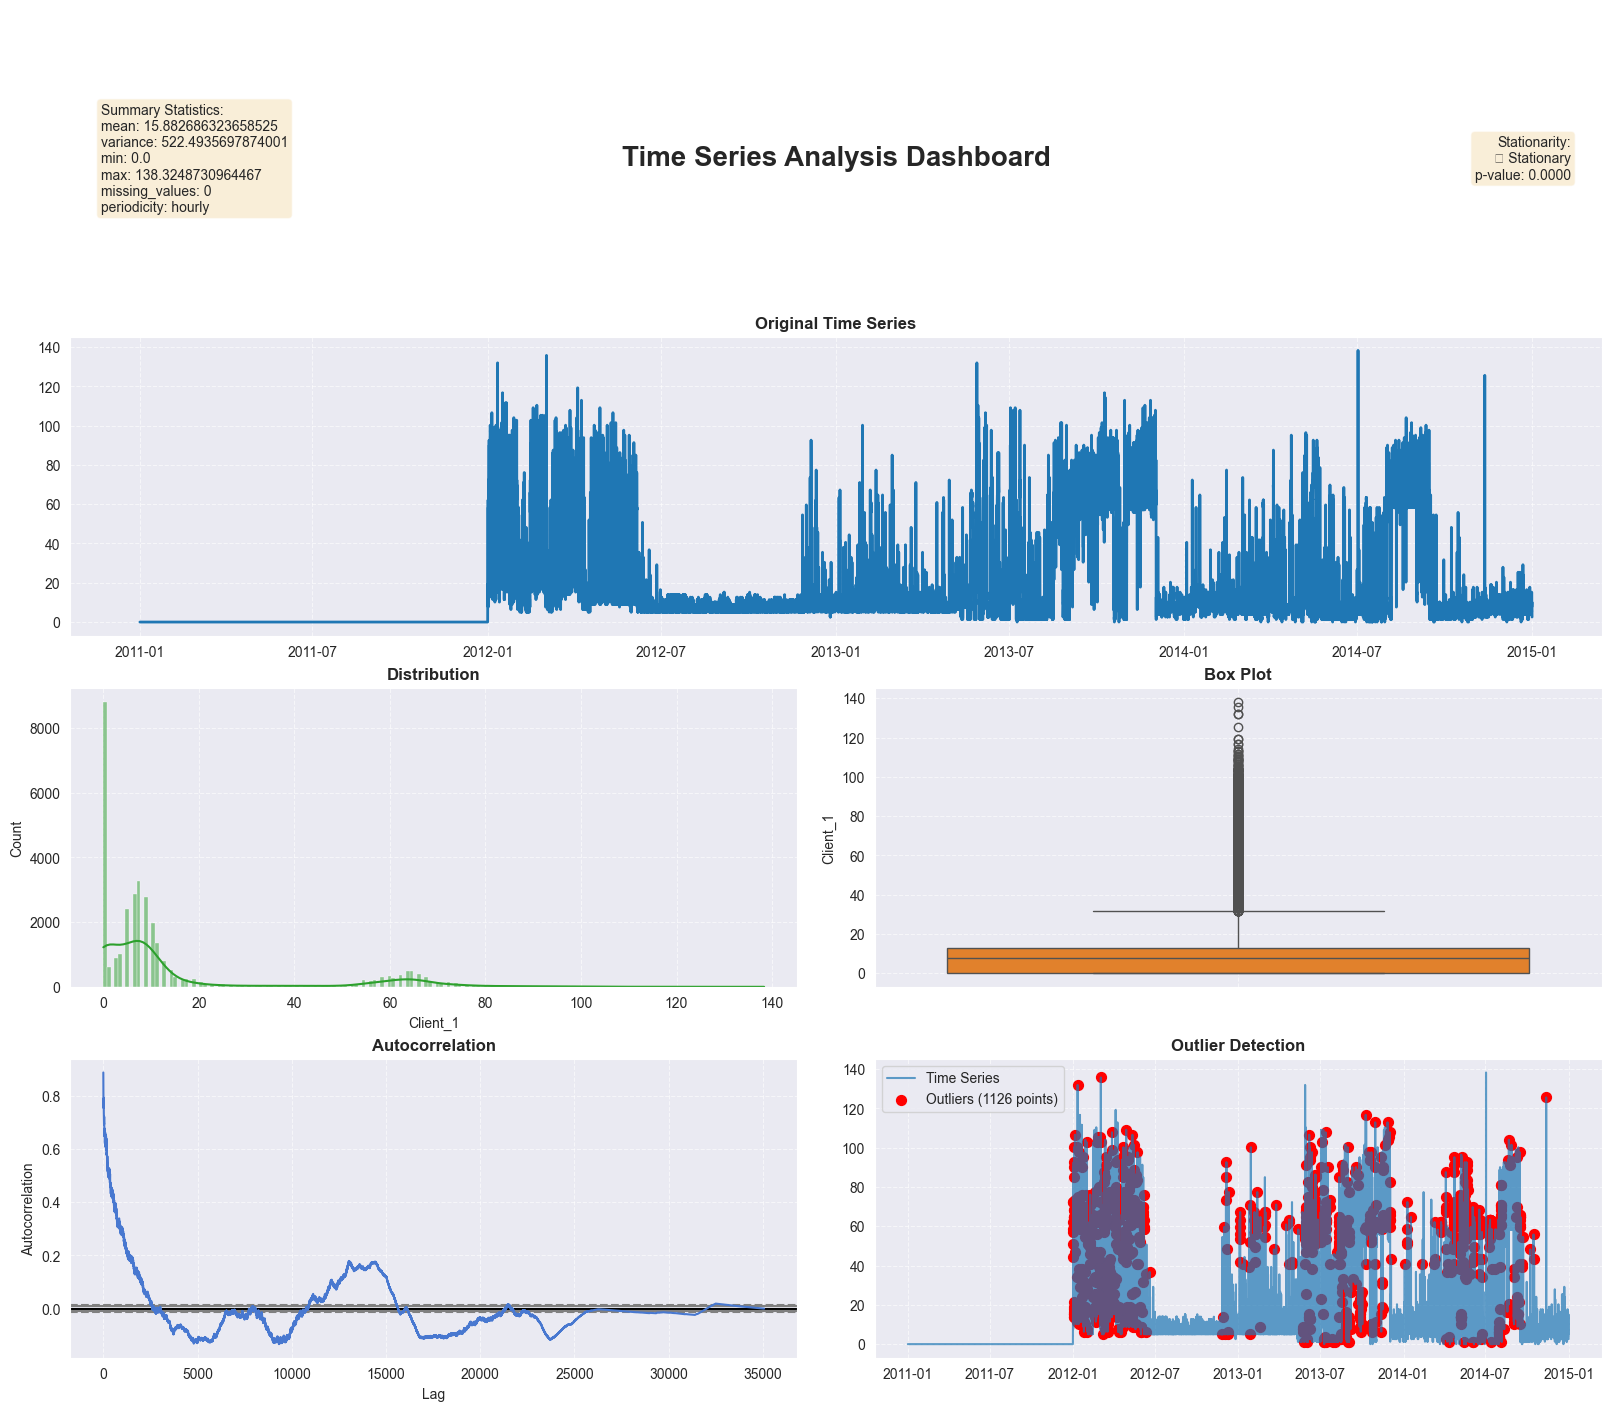

Plot saved to ../../reports//seasonal.png


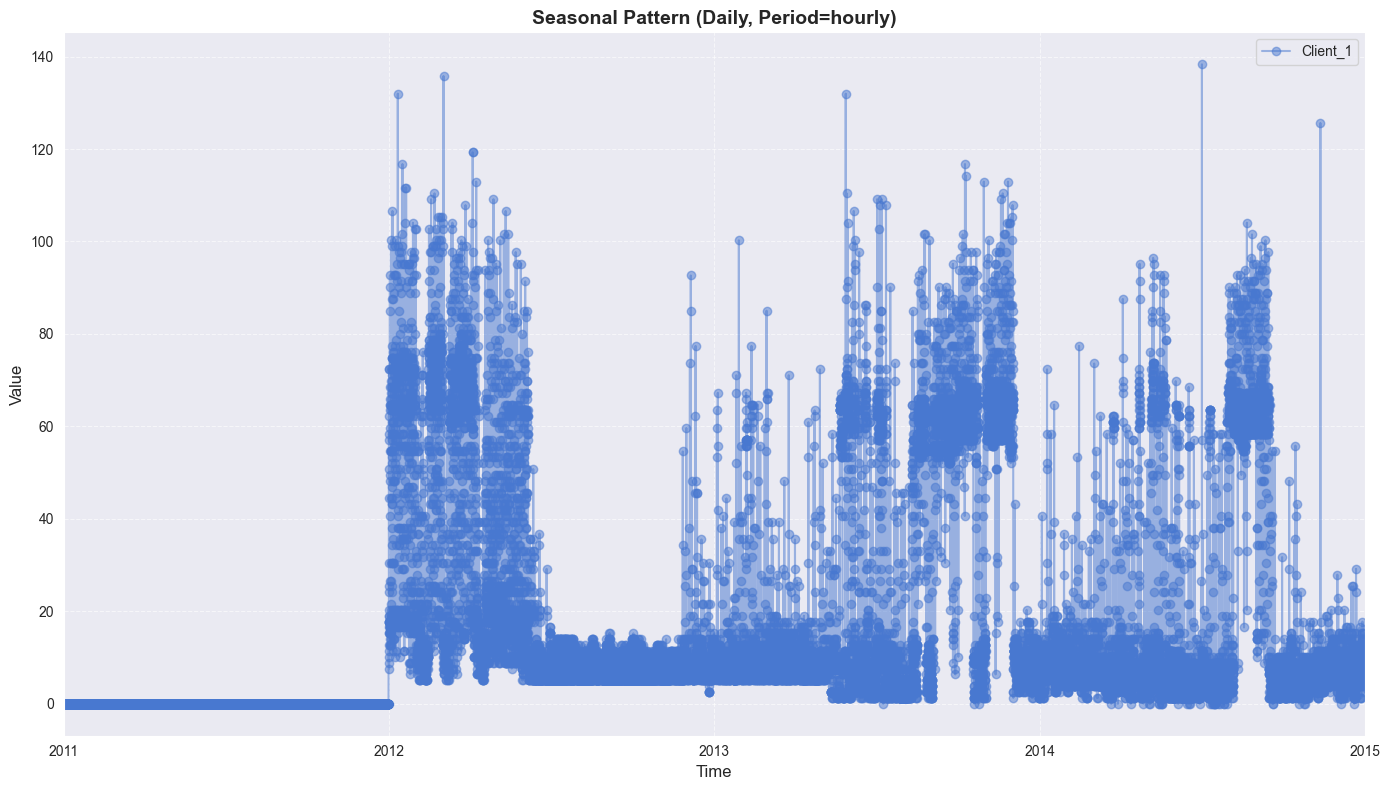

Plot saved to ../../reports//outlier_impact.png


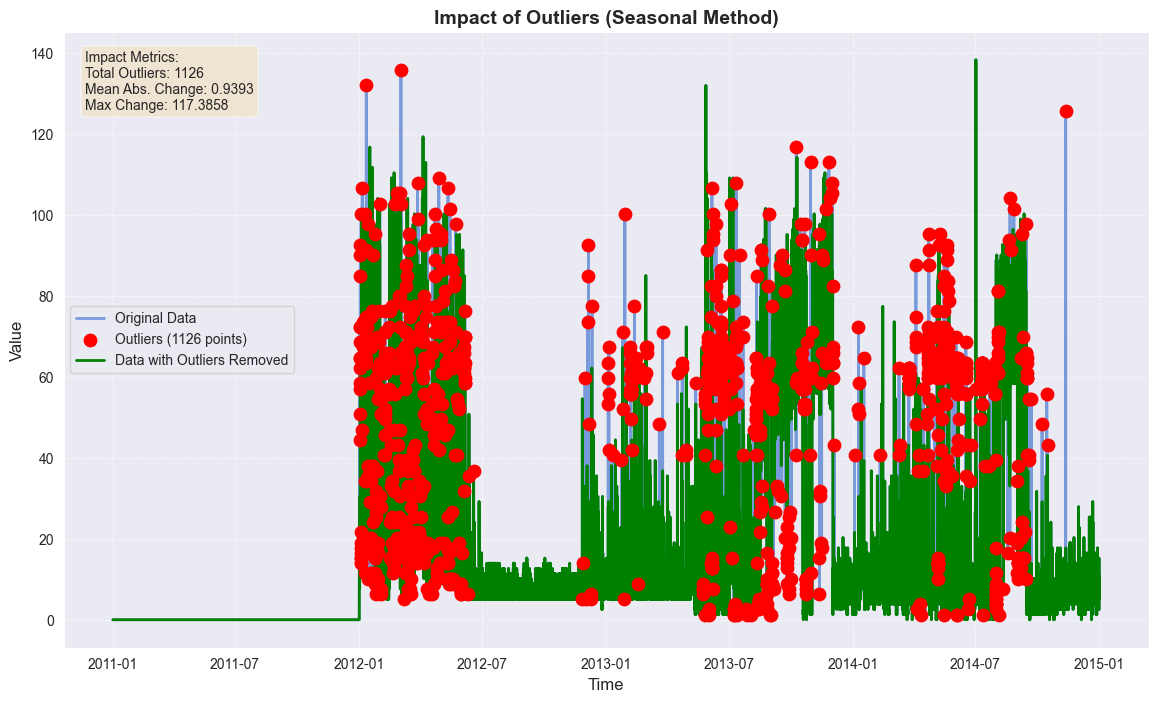

{'statistics': {'mean': np.float64(15.882686323658525),
  'variance': np.float64(522.4935697874001),
  'min': np.float64(0.0),
  'max': np.float64(138.3248730964467),
  'missing_values': np.int64(0),
  'periodicity': 'hourly'},
 'stationarity': {'ADF Statistic': np.float64(-7.2985882768460755),
  'p-value': np.float64(1.357293999717946e-10),
  'Lags Used': 51,
  'Critical Values': {'1%': np.float64(-3.4305367814665044),
   '5%': np.float64(-2.8616225527935106),
   '10%': np.float64(-2.566813940257257)},
  'Stationary': np.True_},
 'outliers': {'zscore': 2012-01-02 12:00:00     92.639594
  2012-01-02 14:00:00     85.025381
  2012-01-02 16:00:00     90.101523
  2012-01-03 16:00:00    100.253807
  2012-01-04 10:00:00     87.563452
                            ...    
  2014-09-12 20:00:00     93.908629
  2014-09-13 12:00:00     88.832487
  2014-09-13 19:00:00     88.832487
  2014-09-14 21:00:00     97.715736
  2014-11-12 09:00:00    125.634518
  Name: Client_1, Length: 381, dtype: float64,

In [10]:
# Select a sample client for analysis
client_ts = df_hourly["Client_1"].dropna()

# Instantiate the EDA class
ts_eda = TimeSeriesEDA(client_ts)

# Run full analysis
ts_eda.run_full_analysis(save_plots=True, output_dir="../../reports/")